In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
len(train)

7613

In [6]:
X = train['text']
Y = train['target']
xtest = test['text']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
X_tfidf = pd.concat([X,xtest])

In [9]:
X_tfidf

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object

In [10]:
tfidf = TfidfVectorizer(stop_words='english')

In [11]:
tfidf.fit(X_tfidf)
X = tfidf.transform(X)
xtest = tfidf.transform(xtest)

In [12]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(X, Y, train_size=0.85, random_state=42)

In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {'gamma':[0.7,0.8,'auto','scale']}

from sklearn.svm import SVC

model = GridSearchCV(SVC(kernel='rbf'), parameters)

In [14]:
model.fit(xtrain,ytrain)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'gamma': [0.7, 0.8, 'auto', 'scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
ypred = model.predict(xval)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(classification_report(yval, ypred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       651
           1       0.83      0.60      0.70       491

    accuracy                           0.78      1142
   macro avg       0.79      0.76      0.76      1142
weighted avg       0.79      0.78      0.77      1142



In [18]:
accuracy_score(yval,ypred)

0.776707530647986

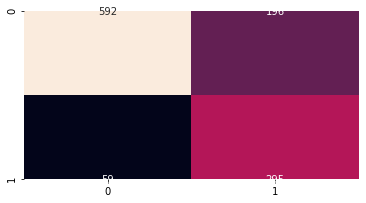

[[592  59]
 [196 295]]


In [25]:
from seaborn import heatmap
mat = confusion_matrix(yval,ypred)
plt.show(heatmap(mat.T, annot=True, square=True, cbar=False, fmt='d'))
print(mat)

In [26]:
ytest = model.predict(xtest)

In [28]:
df = pd.DataFrame()
df['id'] = test['id']
df['target'] = ytest

In [31]:
df.to_csv('Outcom-SVM.csv', index=False)